# フィッツヒュー・南雲方程式

FitzHugh-Nagumo equation．ホジキン・ハクスリーモデルのモデル．

$$
\frac{dv}{dt} = f(v) - w + I_a,\quad \frac{dw}{dt} = bv - \gamma w,\\
f(v) = v(a-v)(v-1)
$$
$v$は膜電位に対応する変数，$w$はイオンチャネルの開口確率$m,n,h$に対応する変数

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2,
        rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

In [2]:
def FHN(t, x, a, b, c, I):
    dvdt = x[0]*(a-x[0])*(x[0]-1) - x[1] + I
    dwdt = b*x[0] - c * x[1]
    return np.array([dvdt, dwdt])

## 興奮性
ちょっとした刺激はすぐに緩和するが閾値を超える刺激に対しては緩和する前に大きい応答が生じる．

In [3]:
sol = solve_ivp(FHN, [0, 400], [0.3, 0.0], args=(0.25, 2e-3, 2e-3, 0.0), dense_output=True)
sol2 = solve_ivp(FHN, [0, 400], [0.2, 0.0], args=(0.25, 2e-3, 2e-3, 0.0), dense_output=True)

In [4]:
t = np.linspace(0, 400, 1000)
z1 = sol.sol(t)
z2 = sol2.sol(t)

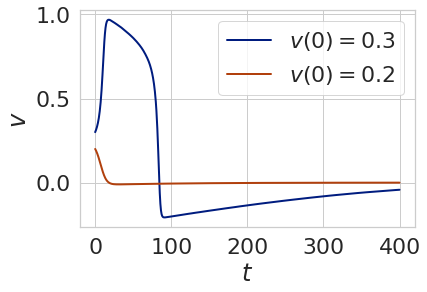

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("$t$")
ax.set_ylabel("$v$")
ax.plot(t, z1[0], label="$v(0)=0.3$")
ax.plot(t, z2[0], label="$v(0)=0.2$")
ax.legend()

## 周期的な神経発火
印加する電流刺激がある条件を満たすと，周期的な発火が生じうる．$(v(0), w(0))$を異なる値にとっても，$t$が大きくなるとともに同じ波形の周期解に漸近していく．

In [6]:
sol3 = solve_ivp(FHN, [0, 2000], [0.3, 0.0], args=(0.25, 2e-3, 2e-3, 0.2), dense_output=True)
t = np.linspace(0, 2000, 2000)
z3 = sol3.sol(t)

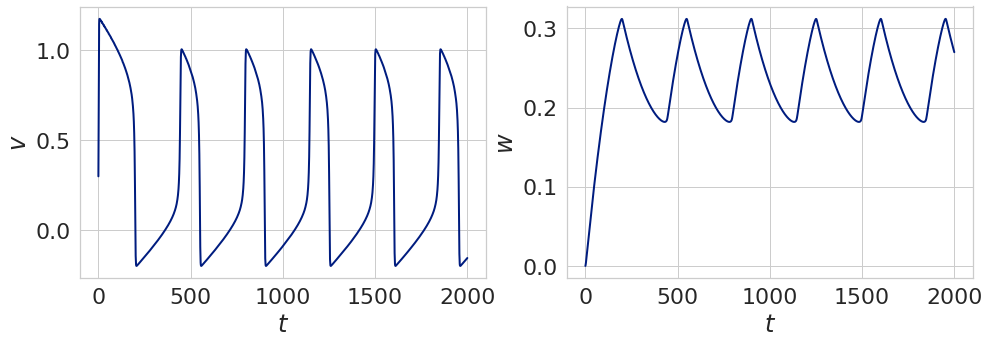

In [7]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.set_xlabel("$t$")
ax.set_ylabel("$v$")
ax.plot(t, z3[0])
ax2.set_xlabel("$t$")
ax2.set_ylabel("$w$")
ax2.plot(t, z3[1])

## 参考文献
J.D. Murray著，三村昌泰監訳『マレー数理生物学入門』丸善出版，2014年（7.5節）